In [1]:
import csv
import argparse
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression

In [2]:
batting_data_path = 'bsb_ref.csv'
# INFO:
# 101,332 Players with up to 20 features each (exluding year, including team)
# if metric not reported for player, set to 0.0 by default

df = pd.read_csv(batting_data_path)
df = df.fillna(0)
df = df[df.pitcher == 'N']   # drop pitchers
df = df[df.year_ID >= 1975]  # 48k players

In [3]:
# find players with the highest number of years 
players = list(set(df['name_common'])) # just a set of all players

# sorting by number of years active
sorted_players = sorted(players, key=lambda player: len(df[df.name_common == player]), reverse=True)

In [5]:
import random
# select 10 random players from the top 50 players in terms of number of years available
sample = random.sample(range(0, 50), 10)
players = [sorted_players[i] for i in sample]

#print(df[df.name_common == player])

In [25]:
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression, Lasso, Ridge

def analyze_players(players, all_player_data, regression_type='unregularized'):
    fig, axs = plot.subplots(len(players), figsize=(10,20))
    fig.subplots_adjust(hspace=.5)

    for i, player in enumerate(players):
        ops_correlation = []
        # a list of all rows pertaining to a player
        player_data = all_player_data[all_player_data.name_common == player]
        x_data = player_data['year_ID'].values.reshape(-1,1)
        y_data = player_data['OPS_plus'].values.reshape(-1,1)
        
        if regression_type == 'unregularized':
            linearRegressor = LinearRegression()
        elif regression_type == 'lasso':
            linearRegressor = Lasso(alpha=0.1)   # alpha is regularization coefficient
        else:   # regression_type == 'ridge'
            linearRegressor = Ridge(alpha=0.1)  # ditto for alpha
        linearRegressor.fit(x_data, y_data)    
        print('Score for ' + player + ' = ' + str(linearRegressor.score(x_data, y_data)))
        
        regression_type = regression_type.upper() # because I'm particular like that
        axs[i].scatter(x_data, y_data, color = 'red')
        axs[i].plot(x_data, linearRegressor.predict(x_data), color = 'blue')
        axs[i].set_title('OPS Score for '+ player)
    #     axs[i].xlabel('OPS')
    #     axs[i].ylabel('Year')
    plot.show()

Score for Ken Griffey Jr. = 0.4080824948075257
Score for Jose Bautista = 0.29157074157100815
Score for Jose Cruz = 0.29428981615349736
Score for Alex Gonzalez = 0.0011518416340990933
Score for B.J. Surhoff = 0.02155986760161077
Score for Carlos Beltran = 0.018560805170611983
Score for Greg Myers = 0.07807411198703607
Score for Ruben Sierra = 0.2984475952937543
Score for Tony Phillips = 0.25138031366976277
Score for Ken Griffey = 0.0861080096801492


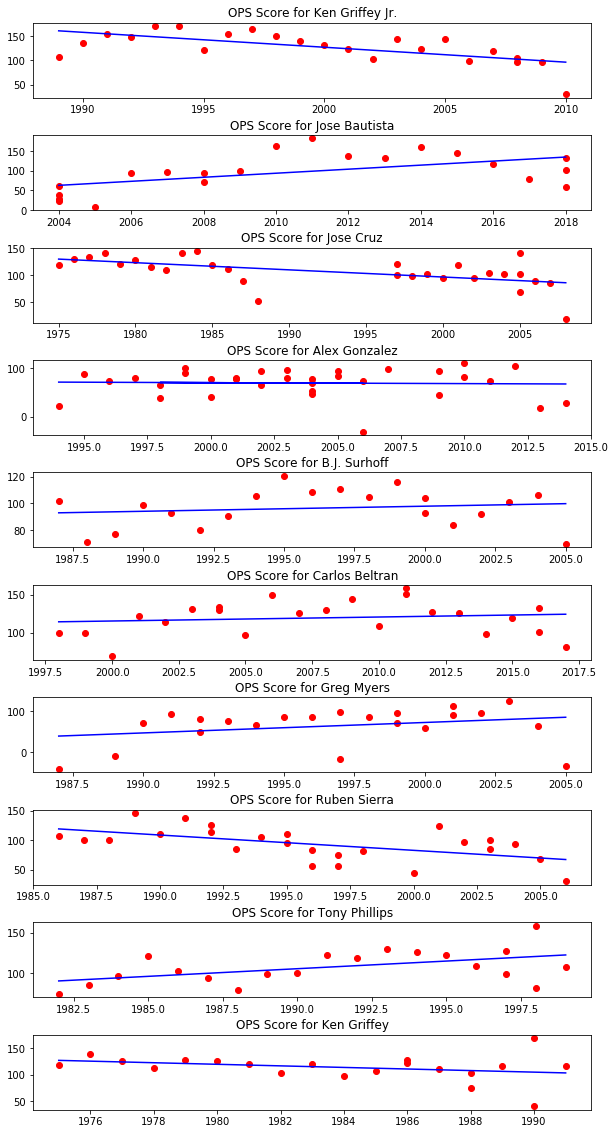

In [20]:
# regression with no regularization
analyze_players(players, df)

Score for Ken Griffey Jr. = 0.4080822464770902
Score for Jose Bautista = 0.29157056854677565
Score for Jose Cruz = 0.29428970803565013
Score for Alex Gonzalez = 0.0011514270019216122
Score for B.J. Surhoff = 0.021558109007812742
Score for Carlos Beltran = 0.01856018728520281
Score for Greg Myers = 0.07807391971931299
Score for Ruben Sierra = 0.29844719187638313
Score for Tony Phillips = 0.2513794550541161
Score for Ken Griffey = 0.08610733199342226


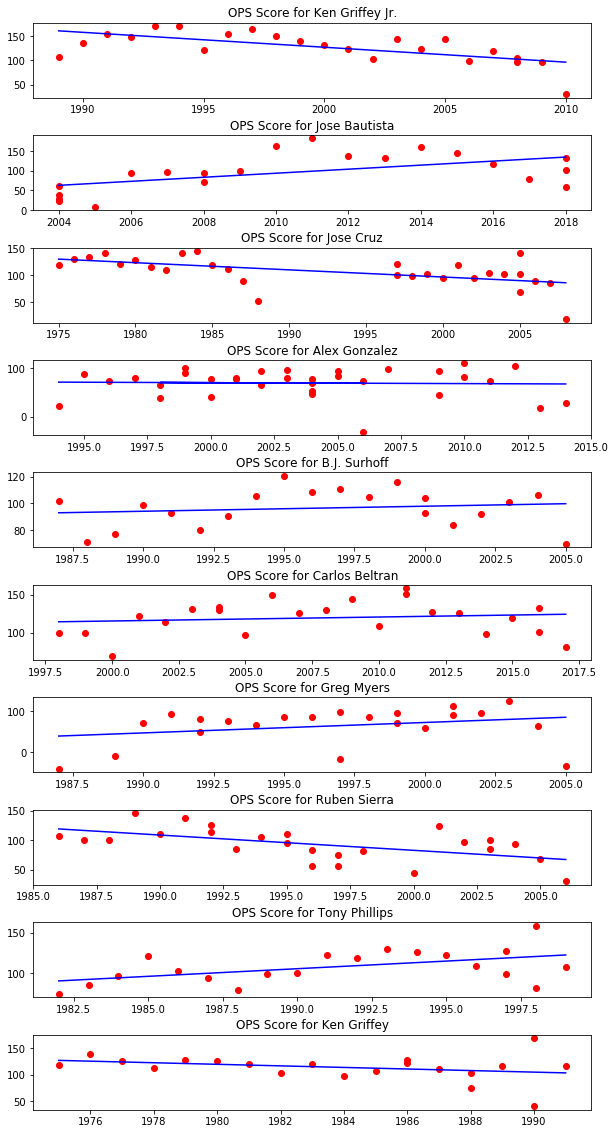

In [21]:
# regression with L1 regularization
analyze_players(players, df, regression_type='lasso')

Score for Ken Griffey Jr. = 0.4080824903303256
Score for Jose Bautista = 0.29157073116515786
Score for Jose Cruz = 0.2942898159259998
Score for Alex Gonzalez = 0.0011518416201110604
Score for B.J. Surhoff = 0.02155986697226686
Score for Carlos Beltran = 0.018560804848173462
Score for Greg Myers = 0.078074109400606
Score for Ruben Sierra = 0.29844759094161033
Score for Tony Phillips = 0.2513803060214166
Score for Ken Griffey = 0.08610800594048673


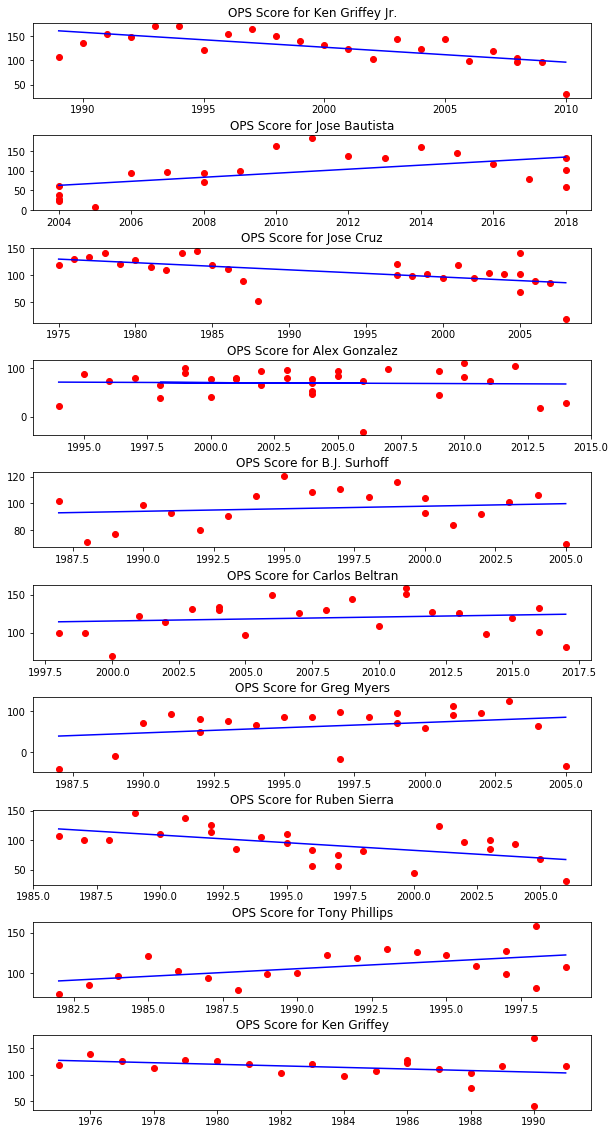

In [26]:
# regression with L2 regularization
analyze_players(players, df, regression_type='ridge')

In [ ]:
#  keep the previous version around in case changes break something
"""
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression

fig, axs = plot.subplots(len(players_to_analyze), figsize=(10,20))
fig.subplots_adjust(hspace=.5)



for i, player in enumerate(players_to_analyze):
    ops_correlation = []
    # a list of all rows pertaining to a player
    player_stats = df_recent_players[df_recent_players['name_common'] == player]
    x_data = player_stats['year_ID'].values.reshape(-1,1)
    y_data = player_stats['OPS_plus'].values.reshape(-1,1)

    linearRegressor = LinearRegression()
    linearRegressor.fit(x_data, y_data)    
    print('Score for ' + player + ' = ' + str(linearRegressor.score(x_data, y_data)))
    


    axs[i].scatter(x_data, y_data, color = 'red')
    axs[i].plot(x_data, linearRegressor.predict(x_data), color = 'blue')
    axs[i].set_title('OPS Score for '+ player)
#     axs[i].xlabel('OPS')
#     axs[i].ylabel('Year')
plot.show()
"""